# Control Systems : Assignment 3

# Import numpy as np

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import numpy.linalg as ln

# The external force function , can be modellled as per your requirement

In [75]:
def f1(t):
    return(1)

# PD control implemented below

In [111]:
m = 4.333
k = 2.551
b =0.442
h=0.1
sigma=0.05 # dirty derivative gain
beta=(2*sigma-h)/(2*sigma+h)
A=np.array([[0,1],[k/m,-b/m]])
B=np.array([[0],[1/m]])
C=np.array([1,0])
D=np.array([[0],[0]])
C_AB=np.array([[0,1/m],[1/m,-b/(m**2)]]) # controllability matrix
if ln.det(C_AB)!=0:
    print("controllable")
else:
    print("not controllable")
aA=np.array([b/m,-k/m**2])
AA=np.array([[1,b/m],[0,1]])
alpha=(1.54,1.2)#to be found from polynomial for desired roots.
K=(alpha-aA)@ln.inv(AA)@ln.inv(C_AB)
K=np.array([K])
Kr=C@ln.inv(A-B@K)@B
Kr=-1/Kr[0]

controllable


In [91]:
tr=2
zeta=0.7
wn = 2.2/tr # natural frequency
des_char_poly = [1, 2*zeta*wn, wn**2]
des_poles = np.roots(des_char_poly)
des_poles,des_char_poly

(array([-0.77+0.78555713j, -0.77-0.78555713j]), [1, 1.54, 1.2100000000000002])

In [92]:
global K,Kr

In [100]:
K

array([[5.7883376, 6.23082  ]])

In [117]:
A

array([[ 0.        ,  1.        ],
       [ 0.5887376 , -0.10200785]])

In [112]:
def F(y,t):
    m = 4.333
    k = 2.551
    b =0.442
    K=np.array([5.7883376, 6.23082])# just an copy of K 
    pos=y[1]
    vel=y[0]
    force_limit=6 # force limit
    #feedback linearized force
    force_fb=f1(t)
    # equlibrium force around pos=0
    x_equi=0
    K=np.array(K)
    force_e=-K@np.array([pos,vel])+Kr*x_ref(t)
    #total force 
    force=force_e+force_fb
    #saturate force 
    if abs(force)>force_limit:
        force=force_limit*np.sign(force)
    return(np.array([force,0]))

# Reference motion of mass

In [106]:
def x_ref(t):
    if (t%100<=49):
        return(-1)
    else:
        return(1)

In [104]:
x_ref(4)

1

# Solving for X''

In [61]:
def f(y,t):
    # physical constants of the system
    m = 4.333
    k = 2.551
    b =0.442
    A=np.array([[m,0],[0,1]])
    B=np.array([[b,k],[-1,0]])
    return(np.dot(inv(A),F(y,t)-np.dot(B,y)))

# Function for rk4 implementation

In [54]:
def rk4(y,t,dt):
    k1=f(y,t)
    k2=f(y*k1*0.5*dt,t+dt*0.5)
    k3=f(y*k2*0.5*dt,t+dt*0.5)
    k4=f(y+k3*dt,t+dt)
    return(dt * (k1 + 2*k2 + 2*k3 + k4) /6)

# Function to call state

In [101]:
def call_state():   
    # initializations matrices
    v_data=[]
    p_data=[]
    y=np.array([0.1,0])
    h=0.1  # dt used during simulation
    time=np.arange(0,1000,h)
    state=[]
    for t in time:
        y=y+rk4(y,t,h)
        state.append(y)
        v_data.append(y[0])
        p_data.append(y[1])
    return(p_data,v_data)

#  Function for Animation

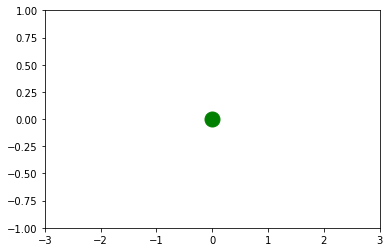

In [114]:
# initialization of plot , line and point objects
fig = plt.figure() 
ax = plt.axes(xlim=(-3, 3), ylim=(-1, 1)) 
point, = ax.plot(0, 0,marker="o",color="green",markersize=15) 
line, = ax.plot([],[],lw=2)
wall, = ax.plot([],[],lw=2)
def init():
    line.set_data([], []) 
    point.set_data([],[])
    wall.set_data([], []) 
    return point, line,wall
# update the animation with each frame
def animate(frame):
    p,v=call_state()
    point.set_data([p[frame]],[0])
    line.set_data(np.linspace(-3,p[frame],100),np.zeros(100))
    wall.set_data(-3*np.ones(100),np.linspace(-0.5,0.5,100))
    return point,line,wall

In [115]:
from matplotlib.animation import FuncAnimation
anim = FuncAnimation(fig, animate,init_func=init,frames=300, interval=20, blit=False)

In [116]:
from IPython import display
video=anim.to_html5_video()
html=display.HTML(video)
display.display(html)
plt.close()

# Simulated vs reference behaviour

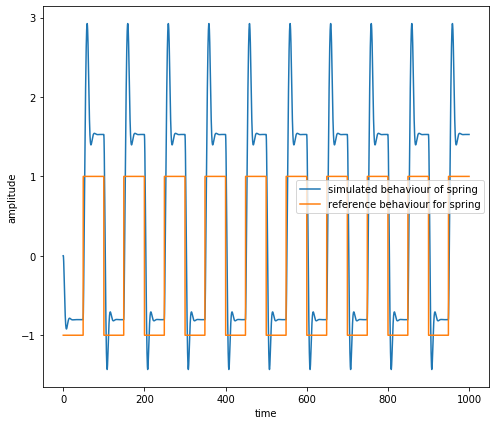

In [113]:
p,v=call_state()
x=np.arange(0,1000,0.1)
y=[x_ref(i) for i in x ]
plt.figure(figsize=(8,7))
plt.plot(x,p,label="simulated behaviour of spring")
plt.plot(x,y,label="reference behaviour for spring")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend() 
plt.show()